In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from nettools.multiplex import MultiplexNetwork
from nettools.multiplex import MultiplexConstructor
from nettools.monoplex import NetworkGenerator, Network
from nettools.multiplex import Percolation, running_mean

# Percolation

I this notebook I will analyze reaserch publicated by *Buldyrev* about cascades in **interdependent networks**. For that purpose I created Percolation module for my **nettools** library, which is able to plot **GCC** size, when changing percolation probability.

In my reaserch I will test SF networks (*Barabassi Albert/ Barabassi Bianconi*) and Erods-Renyi network.
First I will use percolation module on **ER** and **SF** monoplex networks, next this same approach will be used for multiplex networks.

#### Erdos-Renyi monoplex network

Percolation process on **ER** network, <br>Paramaters: *< k > = 2, N = 2000*

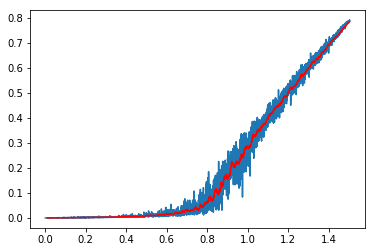

In [23]:
nodes_nm = 2000
ng = NetworkGenerator(nodes=nodes_nm)
mc = MultiplexConstructor()
er1 = ng.er_network(p=2.0 / float(nodes_nm))
mnet = mc.construct(er1)
per = Percolation(mnet)
results = per.run(visualize=True, npoints=3000)

#### Barabassi Albert monoplex network

Percolation process on **BA** network, <br>Paramaters: *< k > = 2m = 1, N = 2000*

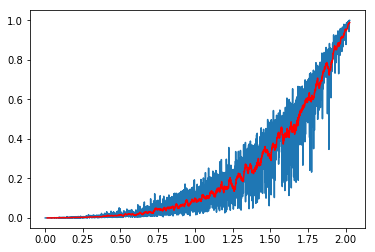

In [24]:
nodes_nm = 2000
ng = NetworkGenerator(nodes=nodes_nm)
mc = MultiplexConstructor()
ba1 = ng.ba_network(m0=1)
mnet = mc.construct(ba1)
per = Percolation(mnet)
results = per.run(visualize=True, npoints=3000)

From first and second plot we can see that percolation threshold for **random** network is something around: 
$$p_c = 1 - \frac{1}{<k>}$$
For Scale-Free networks threshold is a lot of higher, 100 % robusstness for $$N -> \infty$$ 
For real network little lower.

#### Erods Renyi networks
Next different size **ER** networks was tested.

In [ ]:
plt.figure()
for network in [100, 200, 500, 1000, 2000, 3000]:
    ng = NetworkGenerator(nodes=network)
    mc = MultiplexConstructor()
    er = ng.er_network(p=2.0 / float(network))
    mnet = mc.construct(er)
    per = Percolation(mnet)
    x_p, gcc_nodes = per.run(visualize=False, npoints=3000)
    plt.plot(x_p[19:], running_mean(gcc_nodes, 20), hold=True)
plt.show()

In monoplex networks percolation for networks with different number of nodes converge to same function.

In [14]:
plt.figure()
for network in [100, 300, 500, 1000]:
    ng = NetworkGenerator(nodes=network)
    mc = MultiplexConstructor()
    er1 = ng.er_network(p=2.5 / float(network))
    er2 = ng.er_network(p=2.5 / float(network))
    mnet = mc.construct(er1, er2)
    per = Percolation(mnet)
    x_p, gcc_nodes = per.run(visualize=False, npoints=1000)
    plt.plot(x_p[19:], running_mean(gcc_nodes, 20), hold=True)
plt.show()

KeyboardInterrupt: 